## INFO 1998

Problem statement: Predicting Spring rainfall using data from year-year

Datasets source: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

If the rainfall is greater than 1 mm, it will be rain day. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
weather = pd.read_csv('weatherAUS.csv')
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Column name descriptions

Temperatures are in degrees (Celsius)

Rainfall: mm

Sushine: number of hours bright sunshine in a day

WindGustDir: direction of the strongest wind gust in the 24 hours to midnight

WindSpeed: speed (km/h) of the strongest wind gust in the 24 hours to midnight

Humidity: humidity percent

Pressure(time): Atmospheric pressure (hpa) reduced to mean sea level at (time)

Cloud(time): Fraction of sky obscured by cloud at (time). This is measured in "oktas", which are a unit of eigths. It records how many

In [3]:
# Data from 2016/1 to 2019/12

weather_data= weather.copy()
start_date = '2016-01-01'
end_date = '2019-12-031' 
weather_data =weather_data[ (weather_data['Date'] > start_date) & (weather_data['Date'] <= end_date)] #only keep these dates
weather_data.head()


df=pd.DataFrame(weather_data)

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')


weather2= df[df['Date'].dt.month == 3 ]
weather2 = weather2.append(df[df['Date'].dt.month == 4 ])
weather2 = weather2.append(df[df['Date'].dt.month == 5 ])
weather2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2558,2016-03-01,Albury,14.7,35.1,0.0,NaN,NaN,NW,37.0,SE,...,63.0,21.0,1019.5,1016.1,NaN,NaN,20.8,33.7,No,No
2559,2016-03-02,Albury,16.8,37.2,0.0,NaN,NaN,W,31.0,E,...,48.0,10.0,1018.1,1015.9,8.0,NaN,23.9,36.4,No,No
2560,2016-03-03,Albury,16.7,35.0,0.0,NaN,NaN,NNW,50.0,ESE,...,37.0,24.0,1019.4,1016.2,7.0,8.0,25.3,33.2,No,No
2561,2016-03-04,Albury,15.9,37.0,0.0,NaN,NaN,N,26.0,E,...,57.0,22.0,1020.0,1016.1,NaN,NaN,23.0,36.3,No,No
2562,2016-03-05,Albury,20.3,38.5,0.0,NaN,NaN,NNE,28.0,SE,...,50.0,23.0,1019.3,1016.5,NaN,NaN,25.9,37.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145430,2017-05-27,Uluru,9.3,28.0,0.0,NaN,NaN,W,28.0,SSW,...,36.0,16.0,1019.9,1016.9,NaN,NaN,16.6,27.3,No,No
145431,2017-05-28,Uluru,8.0,24.6,0.0,NaN,NaN,E,33.0,SE,...,46.0,25.0,1021.7,1018.8,4.0,NaN,13.8,23.5,No,No
145432,2017-05-29,Uluru,12.7,22.2,0.0,NaN,NaN,E,37.0,E,...,59.0,34.0,1024.3,1021.7,8.0,8.0,13.9,21.0,No,No
145433,2017-05-30,Uluru,9.4,22.7,0.0,NaN,NaN,E,35.0,SE,...,62.0,32.0,1026.6,1023.6,8.0,4.0,11.8,22.3,No,No


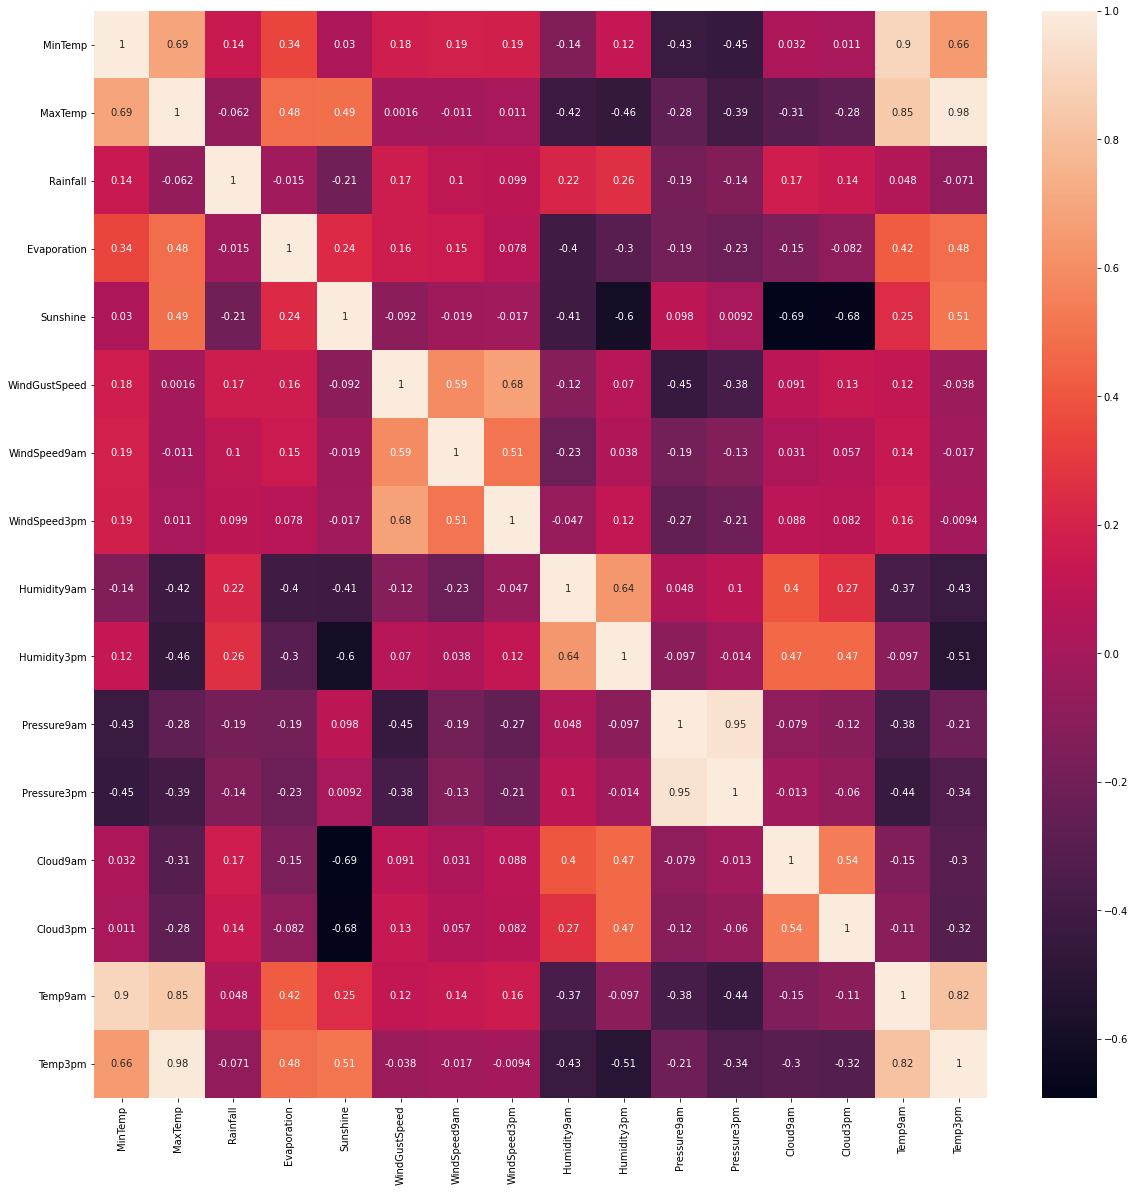

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.694621,0.142883,0.343632,0.030383,0.175744,0.187079,0.186672,-0.137567,0.122463,-0.433290,-0.450277,0.031674,0.011099,0.902648,0.655970
MaxTemp,0.694621,1.000000,-0.062126,0.480071,0.488580,0.001571,-0.010970,0.010899,-0.419942,-0.457574,-0.275400,-0.394089,-0.311140,-0.277405,0.849909,0.983071
Rainfall,0.142883,-0.062126,1.000000,-0.014721,-0.208037,0.166203,0.102998,0.098578,0.218768,0.263409,-0.189367,-0.141953,0.172655,0.142330,0.048341,-0.071178
Evaporation,0.343632,0.480071,-0.014721,1.000000,0.236576,0.161493,0.151724,0.078026,-0.402183,-0.301801,-0.193222,-0.225044,-0.151206,-0.082160,0.419383,0.478339
Sunshine,0.030383,0.488580,-0.208037,0.236576,1.000000,-0.091610,-0.018834,-0.016561,-0.413998,-0.599272,0.098493,0.009173,-0.692436,-0.684824,0.249968,0.513323
WindGustSpeed,0.175744,0.001571,0.166203,0.161493,-0.091610,1.000000,0.591241,0.679218,-0.117589,0.070343,-0.445108,-0.378556,0.090781,0.134334,0.118089,-0.037761
WindSpeed9am,0.187079,-0.010970,0.102998,0.151724,-0.018834,0.591241,1.000000,0.506599,-0.227116,0.038295,-0.191507,-0.134153,0.030831,0.057173,0.138080,-0.017309
WindSpeed3pm,0.186672,0.010899,0.098578,0.078026,-0.016561,0.679218,0.506599,1.000000,-0.047032,0.119163,-0.268258,-0.210474,0.088048,0.081540,0.156272,-0.009356
Humidity9am,-0.137567,-0.419942,0.218768,-0.402183,-0.413998,-0.117589,-0.227116,-0.047032,1.000000,0.637567,0.047840,0.100634,0.399925,0.270863,-0.365404,-0.430945
Humidity3pm,0.122463,-0.457574,0.263409,-0.301801,-0.599272,0.070343,0.038295,0.119163,0.637567,1.000000,-0.097184,-0.014237,0.469029,0.465501,-0.096586,-0.512314


In [4]:
# Determine the correlation of the data

data= weather2.corr()

# visualize the correlation matrix to see the heatmap

import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sn.heatmap(data, annot=True)
plt.show()

data

Rainfall : 	0.086260	-0.095932	1.000000	-0.015610	-0.220605	0.160010	0.098968	0.084083	0.225069	0.259327	-0.181717	-0.139804	0.177310	0.144382	-0.007574	-0.104719

Most correlated features:

1. Humidity 9am
2. Sunshine
3. Humidity 3pm
4. Cloud 9am
5. Cloud 3pm

In [5]:
# Drop NaN data

cleandata_weather2= pd.DataFrame(weather2)


three_correlated_features= cleandata_weather2[['Humidity9am', 'Sunshine', 'Humidity3pm', 'Rainfall', 'RainToday']]
three_correlated_features= three_correlated_features.dropna()

correlated_features = three_correlated_features[['Humidity9am', 'Sunshine', 'Humidity3pm']]
target= three_correlated_features['Rainfall']

print(len(correlated_features))
print(len(target))

2830
2830


In [6]:
x_tr_3, x_te_3, y_tr_3, y_te_3 = train_test_split(correlated_features, target, test_size = 0.3, random_state=42)
threeftmodel= LinearRegression();
threeftmodel.fit(x_tr_3,  y_tr_3)
threepred = threeftmodel.predict(x_te_3)

threeftmodel= LinearRegression();
threeftmodel.fit(x_tr_3,  y_tr_3)
threepred = threeftmodel.predict(x_te_3)

threeftmodel.coef_
threeftmodel.intercept_


example_Humidity9am = 62.0
example_Sunshine = 5.9
example_Humidity3pm = 57.0
B1= threeftmodel.coef_[0]
B2= threeftmodel.coef_[1]
B3= threeftmodel.coef_[2]
k= threeftmodel.intercept_

manually_predict_Rainfall= B1*example_Humidity9am + B2*example_Sunshine + B3*example_Humidity3pm + k
print(manually_predict_Rainfall)
threepred= threeftmodel.predict([[example_Humidity9am,example_Sunshine, example_Humidity3pm ]])[0]
print(threepred)
print("3ftmodel sklearn's score:", threeftmodel.score(x_tr_3,y_tr_3))


2.3979513385891504
2.3979513385891504
3ftmodel sklearn's score: 0.09041544836812598


# visualization

plt.scatter(temps_unique['Longitude'], temps_unique['Latitude'], c=temps_unique['AverageTemperature'].values.ravel() ) 

## Build a kNN model predicting whether it will rain or not

In [8]:

features= three_correlated_features[['Humidity9am', 'Sunshine', 'Humidity3pm']]
target= three_correlated_features['RainToday']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# This is the function we use to create the kNN model (default k=5)
model = KNeighborsClassifier()

# TODO fit the model using the train data
model.fit(x_train, y_train)

# TODO store the predictions for the test sets
predictions =  model.predict(x_test)
predictions

array(['Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Ye

In [9]:
# find the accuracy score of your predictions

from sklearn.metrics import accuracy_score
print("sklearn's accuracy score for RainToday:", accuracy_score(y_test, predictions) )

sklearn's accuracy score for RainToday: 0.7862190812720848


## find out the relationship between the value of k and the accuracy score of the model for this data set.

In [10]:
loop= []

for i in range(1, 51):
    model_loop = KNeighborsClassifier(i)
    model_loop.fit(x_train, y_train)
    predictions_loop = model_loop.predict(x_test)
    print("accuracy score when k=",i,":", accuracy_score(y_test, predictions_loop))
    
    loop.append(accuracy_score(y_test, predictions_loop))

print(max(loop))

accuracy score when k= 1 : 0.7561837455830389
accuracy score when k= 2 : 0.7791519434628975
accuracy score when k= 3 : 0.7826855123674912
accuracy score when k= 4 : 0.784452296819788
accuracy score when k= 5 : 0.7862190812720848
accuracy score when k= 6 : 0.7879858657243817
accuracy score when k= 7 : 0.7685512367491166
accuracy score when k= 8 : 0.7791519434628975
accuracy score when k= 9 : 0.7685512367491166
accuracy score when k= 10 : 0.784452296819788
accuracy score when k= 11 : 0.7791519434628975
accuracy score when k= 12 : 0.8003533568904594
accuracy score when k= 13 : 0.7950530035335689
accuracy score when k= 14 : 0.803886925795053
accuracy score when k= 15 : 0.8003533568904594
accuracy score when k= 16 : 0.7985865724381626
accuracy score when k= 17 : 0.7950530035335689
accuracy score when k= 18 : 0.7950530035335689
accuracy score when k= 19 : 0.7897526501766784
accuracy score when k= 20 : 0.7985865724381626
accuracy score when k= 21 : 0.7915194346289752
accuracy score when k= 22

[0.75618375 0.77915194 0.78268551 0.7844523  0.78621908 0.78798587
 0.76855124 0.77915194 0.76855124 0.7844523  0.77915194 0.80035336
 0.795053   0.80388693 0.80035336 0.79858657 0.795053   0.795053
 0.78975265 0.79858657 0.79151943 0.79151943 0.78621908 0.78798587
 0.78621908 0.78268551 0.7844523  0.79328622 0.79151943 0.79858657
 0.78975265 0.79151943 0.78798587 0.78621908 0.78975265 0.78621908
 0.7844523  0.78798587 0.7844523  0.78621908 0.78091873 0.78621908
 0.78268551 0.77915194 0.78091873 0.78268551 0.78621908 0.78798587
 0.78798587 0.7844523 ]


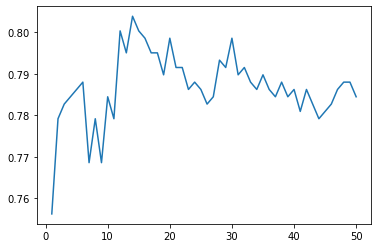

In [11]:
xpoints= np.arange(1, 51)
ypoints= np.array(loop)

print(ypoints)
plt.plot(xpoints,ypoints)
plt.show()

## Decision Tree

The decision tree algorithm can be used to do both classification as well as regression and has the advantage of not assuming a linear model. Decisions trees are usually easy to represent visually which makes it easy to understand how the model actually works. 

### Geometric Intuition
![image](https://docs.microsoft.com/en-us/azure/machine-learning/studio/media/algorithm-choice/image5.png)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets

features= three_correlated_features[['Humidity9am', 'Sunshine', 'Humidity3pm']]
target= three_correlated_features['RainToday']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creates the Decision Tree Classifier
model=tree.DecisionTreeClassifier(max_depth=5)

#TODO: train the model
model.fit(x_train,y_train)

#TODO: Calculate the training and testing accuracy
dtree_pred_train = model.predict(x_train)
dtree_pred_test = model.predict(x_test) 
print("Train Accuracy: ", accuracy_score(y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, dtree_pred_test))

Train Accuracy:  0.8136042402826855
Test Accuracy:  0.7897526501766784


The accuracy for predicting whether it will rain: Desicion Tree with higher accuracy than kNN, linear regression

Desicion Tree
Train Accuracy:  0.8124126920774296
Test Accuracy:  0.7964884277733439

kNN
RainToday
Train Accuracy: 0.7741420590582602

Linear Regression with 3 features
3ftmodel sklearn's score: 0.08909850680407838